In [320]:
import pandas as pd
df=pd.read_csv('hdbprice.csv')
df.drop(columns=['street_name','block','lease_commence_date'],inplace=True)
df



,month,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,62 years 05 months,265000.0
...,...,...,...,...,...,...,...,...
105470,2021-08,YISHUN,EXECUTIVE,10 TO 12,146.0,Maisonette,65 years 11 months,690000.0
105471,2021-08,YISHUN,EXECUTIVE,04 TO 06,146.0,Maisonette,63 years 01 month,620000.0
105472,2021-08,YISHUN,EXECUTIVE,01 TO 03,152.0,Maisonette,62 years 11 months,685000.0
105473,2021-08,YISHUN,EXECUTIVE,07 TO 09,142.0,Apartment,64 years 09 months,650000.0


In [322]:
df.describe()



,floor_area_sqm,resale_price
count,105475.000000,1.054750e+05
mean,97.830997,4.526470e+05
std,24.170892,1.569937e+05
min,31.000000,1.400000e+05
25%,82.000000,3.400000e+05
50%,95.000000,4.200000e+05
75%,113.000000,5.300000e+05
max,249.000000,1.268000e+06


In [324]:

def calculate_remaining_lease(remaining_lease: str) -> int:
    split_lease = remaining_lease.split()
    
    try:
       years = int(split_lease[0])
       months=int(split_lease[2])
       return year*12 + month
    except: 
       
       year = int(split_lease[0])
       return year*12
df['remaining_lease_months'] = df['remaining_lease'].apply(calculate_remaining_lease)

print(df.isnull().sum())
df=df.drop(columns=['remaining_lease'])

df

month                     0
town                      0
flat_type                 0
storey_range              0
floor_area_sqm            0
flat_model                0
remaining_lease           0
resale_price              0
remaining_lease_months    0
dtype: int64


,month,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,remaining_lease_months
0,2017-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,232000.0,732
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,250000.0,720
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,262000.0,744
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,265000.0,744
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,265000.0,744
...,...,...,...,...,...,...,...,...
105470,2021-08,YISHUN,EXECUTIVE,10 TO 12,146.0,Maisonette,690000.0,780
105471,2021-08,YISHUN,EXECUTIVE,04 TO 06,146.0,Maisonette,620000.0,756
105472,2021-08,YISHUN,EXECUTIVE,01 TO 03,152.0,Maisonette,685000.0,744
105473,2021-08,YISHUN,EXECUTIVE,07 TO 09,142.0,Apartment,650000.0,768


In [326]:
df.sort_values(['town'], ascending=False)



,month,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,remaining_lease_months
105474,2021-08,YISHUN,EXECUTIVE,01 TO 03,145.0,Apartment,595000.0,756
38682,2018-10,YISHUN,4 ROOM,04 TO 06,84.0,Simplified,280000.0,804
38672,2018-10,YISHUN,3 ROOM,07 TO 09,67.0,New Generation,298000.0,780
38673,2018-10,YISHUN,3 ROOM,10 TO 12,68.0,New Generation,298000.0,792
38674,2018-10,YISHUN,3 ROOM,07 TO 09,73.0,Model A,302000.0,816
...,...,...,...,...,...,...,...,...
82798,2020-11,ANG MO KIO,3 ROOM,04 TO 06,81.0,New Generation,331000.0,744
82797,2020-11,ANG MO KIO,3 ROOM,10 TO 12,74.0,New Generation,306000.0,684
82796,2020-11,ANG MO KIO,3 ROOM,04 TO 06,67.0,New Generation,270000.0,684
82795,2020-11,ANG MO KIO,3 ROOM,07 TO 09,67.0,New Generation,265000.0,684


C:\Users\Sid\AppData\Local\Temp\ipykernel_12516\3772462690.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a1.set_xticklabels(a1.get_xticklabels(),rotation=90)


[Text(0, 0, 'ANG MO KIO'),
 Text(1, 0, 'BEDOK'),
 Text(2, 0, 'BISHAN'),
 Text(3, 0, 'BUKIT BATOK'),
 Text(4, 0, 'BUKIT MERAH'),
 Text(5, 0, 'BUKIT PANJANG'),
 Text(6, 0, 'BUKIT TIMAH'),
 Text(7, 0, 'CENTRAL AREA'),
 Text(8, 0, 'CHOA CHU KANG'),
 Text(9, 0, 'CLEMENTI'),
 Text(10, 0, 'GEYLANG'),
 Text(11, 0, 'HOUGANG'),
 Text(12, 0, 'JURONG EAST'),
 Text(13, 0, 'JURONG WEST'),
 Text(14, 0, 'KALLANG/WHAMPOA'),
 Text(15, 0, 'MARINE PARADE'),
 Text(16, 0, 'PASIR RIS'),
 Text(17, 0, 'PUNGGOL'),
 Text(18, 0, 'QUEENSTOWN'),
 Text(19, 0, 'SEMBAWANG'),
 Text(20, 0, 'SENGKANG'),
 Text(21, 0, 'SERANGOON'),
 Text(22, 0, 'TAMPINES'),
 Text(23, 0, 'TOA PAYOH'),
 Text(24, 0, 'WOODLANDS'),
 Text(25, 0, 'YISHUN')]

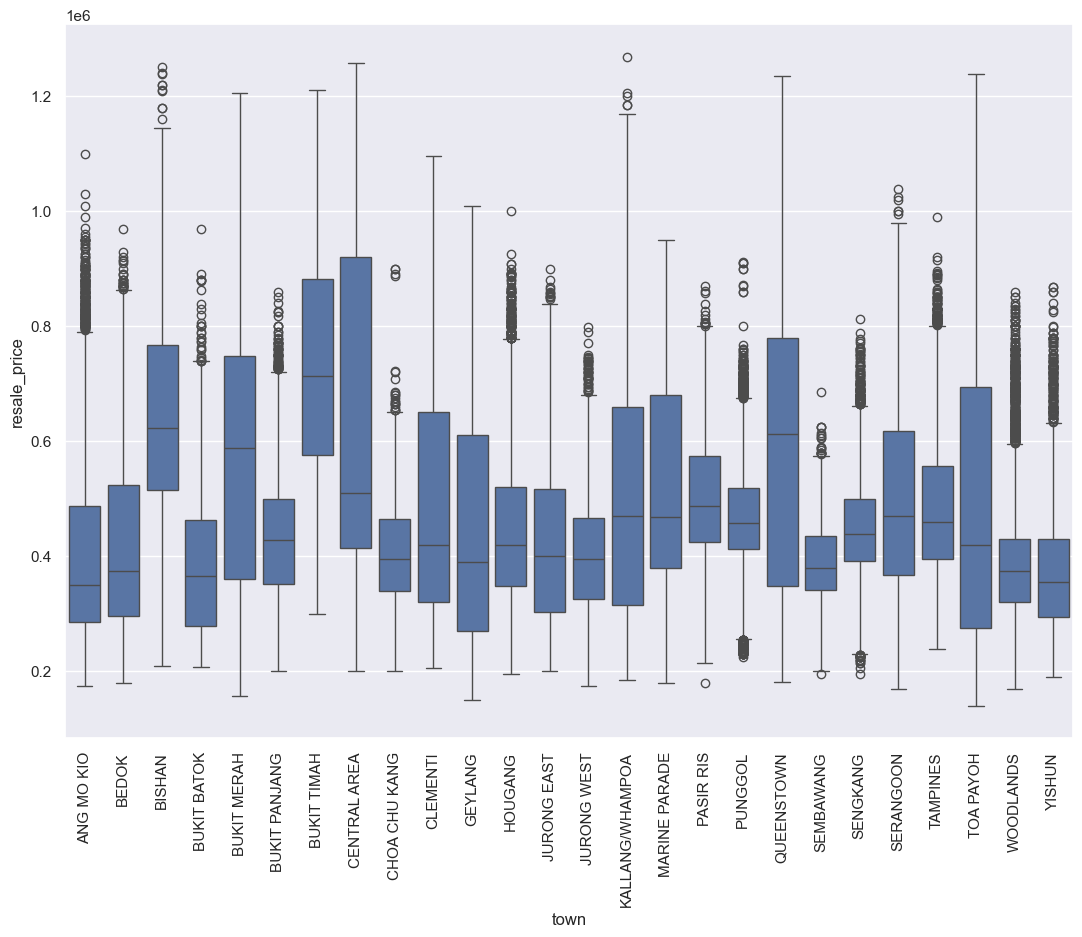

In [328]:
import seaborn as sns

           
        
           
             
        

a1=sns.boxplot(data=df,x='town',y='resale_price')
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)



In [330]:
#The highest resale price is in Bukit Timah with the lowest price volatiity or the inter quatile range being in Woodlands.The location with the lowest possible price volatility and highest resale price is Bukit Timah,therefore it is best for the couple to uy a flat in Bukit Timah.

,floor_area_sqm,resale_price,remaining_lease_months
count,105475.000000,1.054750e+05,105475.000000
mean,97.830997,4.526470e+05,892.978393
std,24.170892,1.569937e+05,158.709307
min,31.000000,1.400000e+05,0.000000
25%,82.000000,3.400000e+05,768.000000
50%,95.000000,4.200000e+05,900.000000
75%,113.000000,5.300000e+05,1008.000000
max,249.000000,1.268000e+06,1164.000000


C:\Users\Sid\AppData\Local\Temp\ipykernel_12516\1592446348.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a1.set_xticklabels(a1.get_xticklabels(),rotation=90)


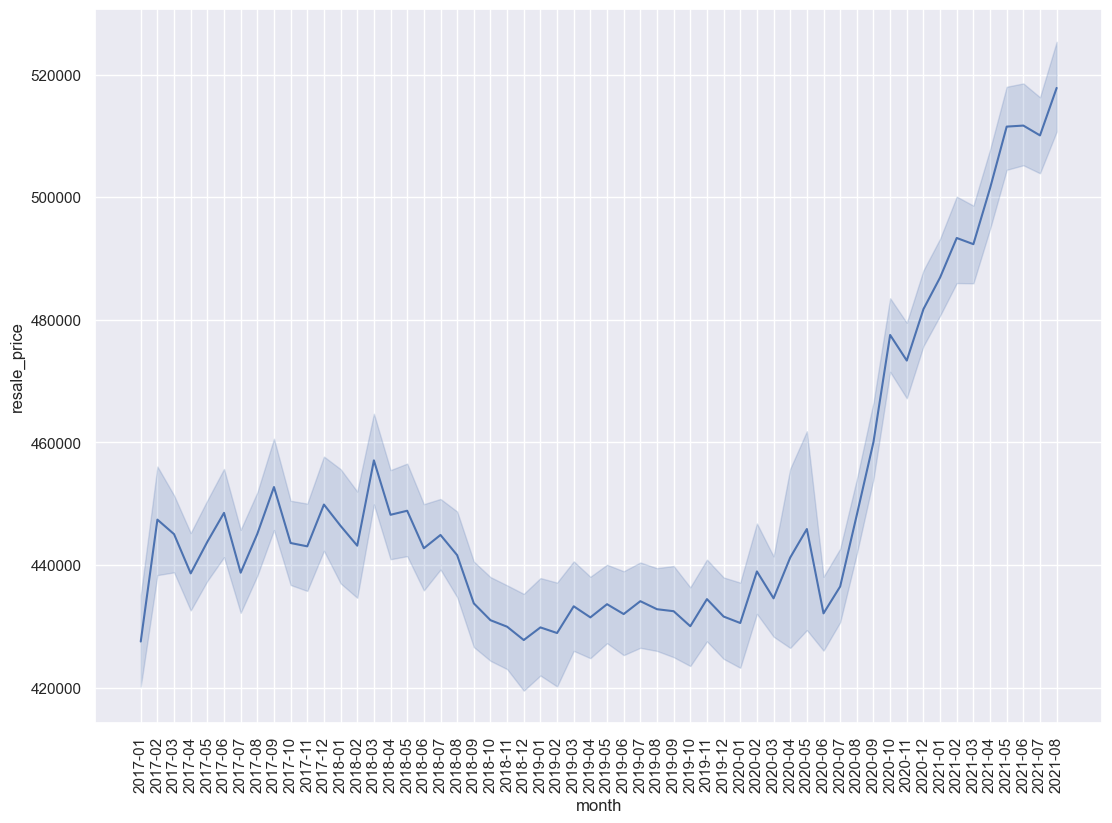

In [332]:
import seaborn as sns
a1=sns.lineplot(data=df,x="month",y="resale_price")
a1.set_xticklabels(a1.get_xticklabels(),rotation=90)
sns.set_theme(rc={'figure.figsize':(13,9.27)})


C:\Users\Sid\AppData\Local\Temp\ipykernel_12516\1592446348.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a1.set_xticklabels(a1.get_xticklabels(),rotation=90)


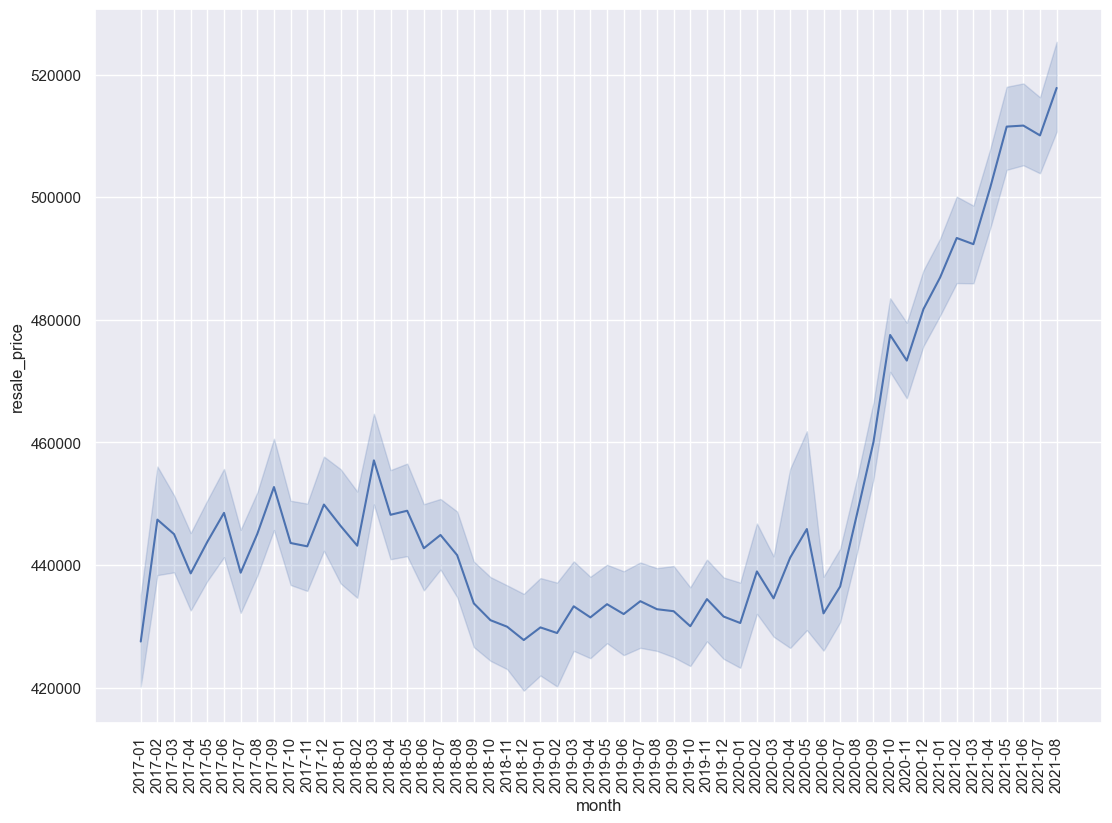

In [332]:
#It can be seen from 2020's onwards after Covid 19 there has been an increased resale price.The resale price is expected to rise even further at the future at a hgiher rate.

C:\Users\Sid\AppData\Local\Temp\ipykernel_12516\1725257565.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a2.set_xticklabels(a2.get_xticklabels(),rotation=90)


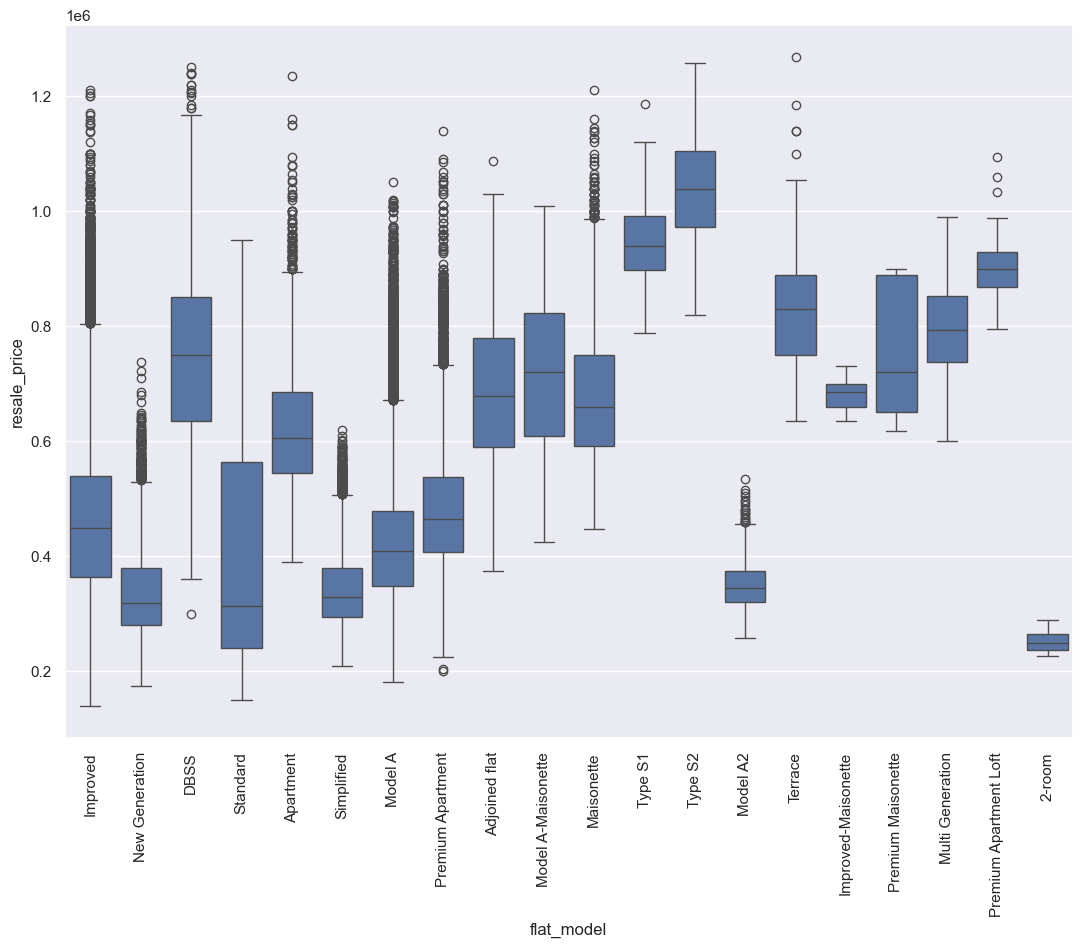

In [334]:
import seaborn as sns
a2=sns.boxplot(data=df,x="flat_model",y="resale_price")
a2.set_xticklabels(a2.get_xticklabels(),rotation=90)
sns.set_theme(rc={'figure.figsize':(13,9.27)})


C:\Users\Sid\AppData\Local\Temp\ipykernel_12516\1725257565.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a2.set_xticklabels(a2.get_xticklabels(),rotation=90)


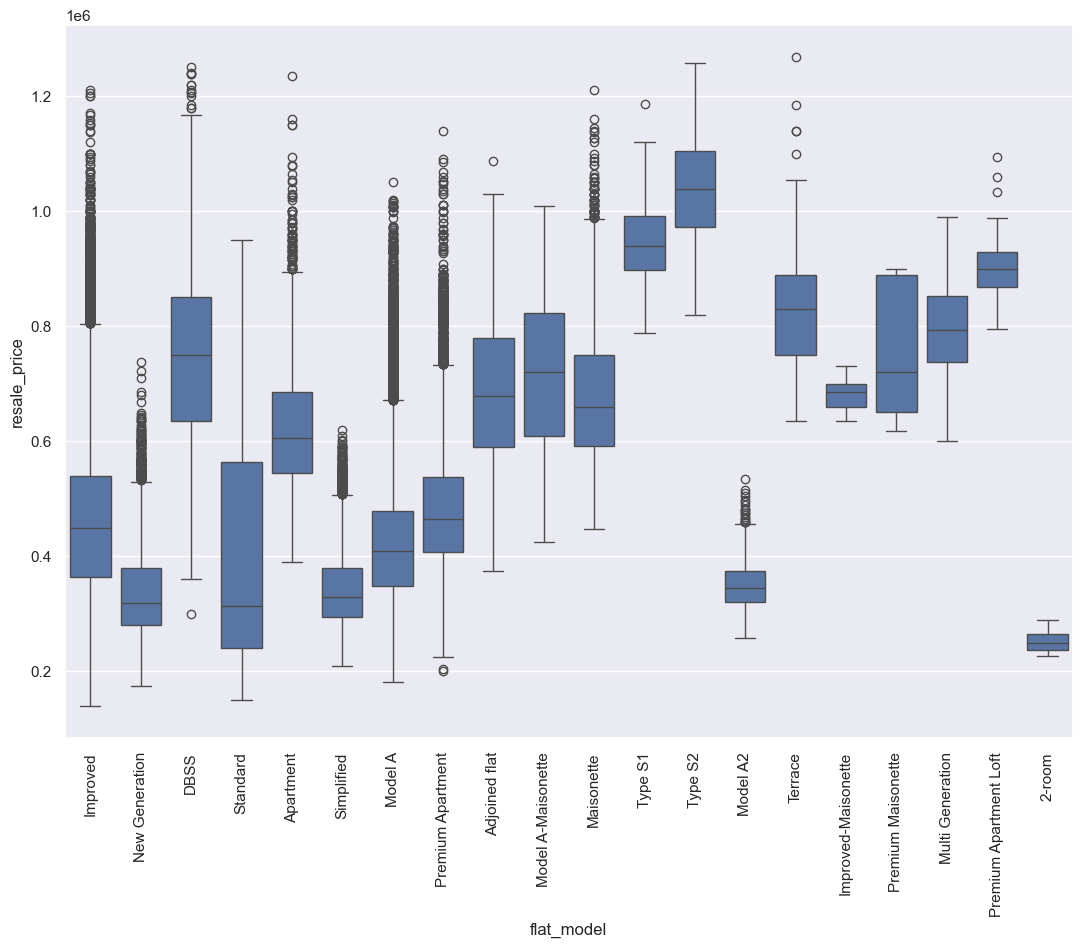

In [334]:
A premium apartment loft is the most ideal flat model to purchase as it has a relativel low volatility and better resale price.


C:\Users\Sid\AppData\Local\Temp\ipykernel_12516\720703801.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  a3.set_xticklabels(a3.get_xticklabels(),rotation=90)


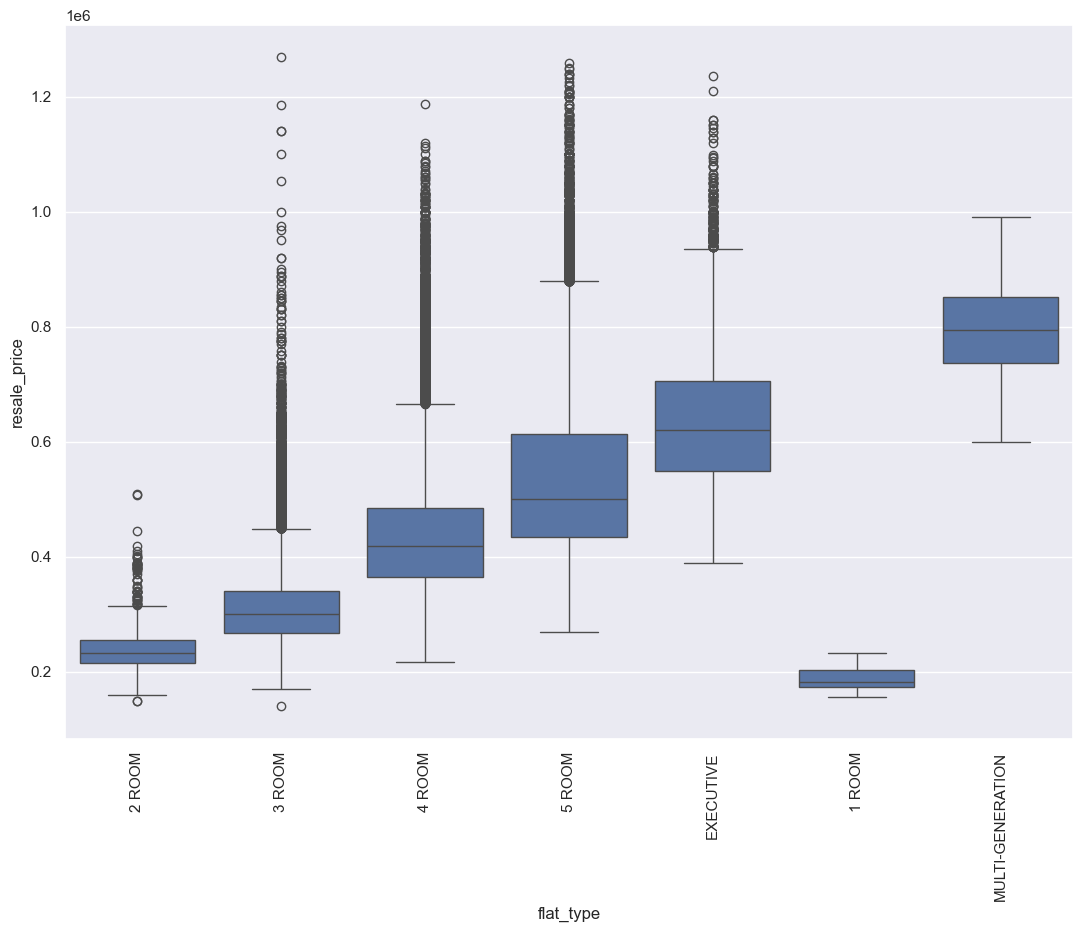

In [336]:
import seaborn as sns
a3=sns.boxplot(data=df,x="flat_type",y="resale_price")
a3.set_xticklabels(a3.get_xticklabels(),rotation=90)
sns.set_theme(rc={'figure.figsize':(13,9.27)})


Amongst the different flat models,multi generational flats will have a higher resale price with lowest possible price volatility


C:\Users\Sid\AppData\Local\Temp\ipykernel_12516\4222704325.py:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
C:\Users\Sid\AppData\Local\Temp\ipykernel_12516\4222704325.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)


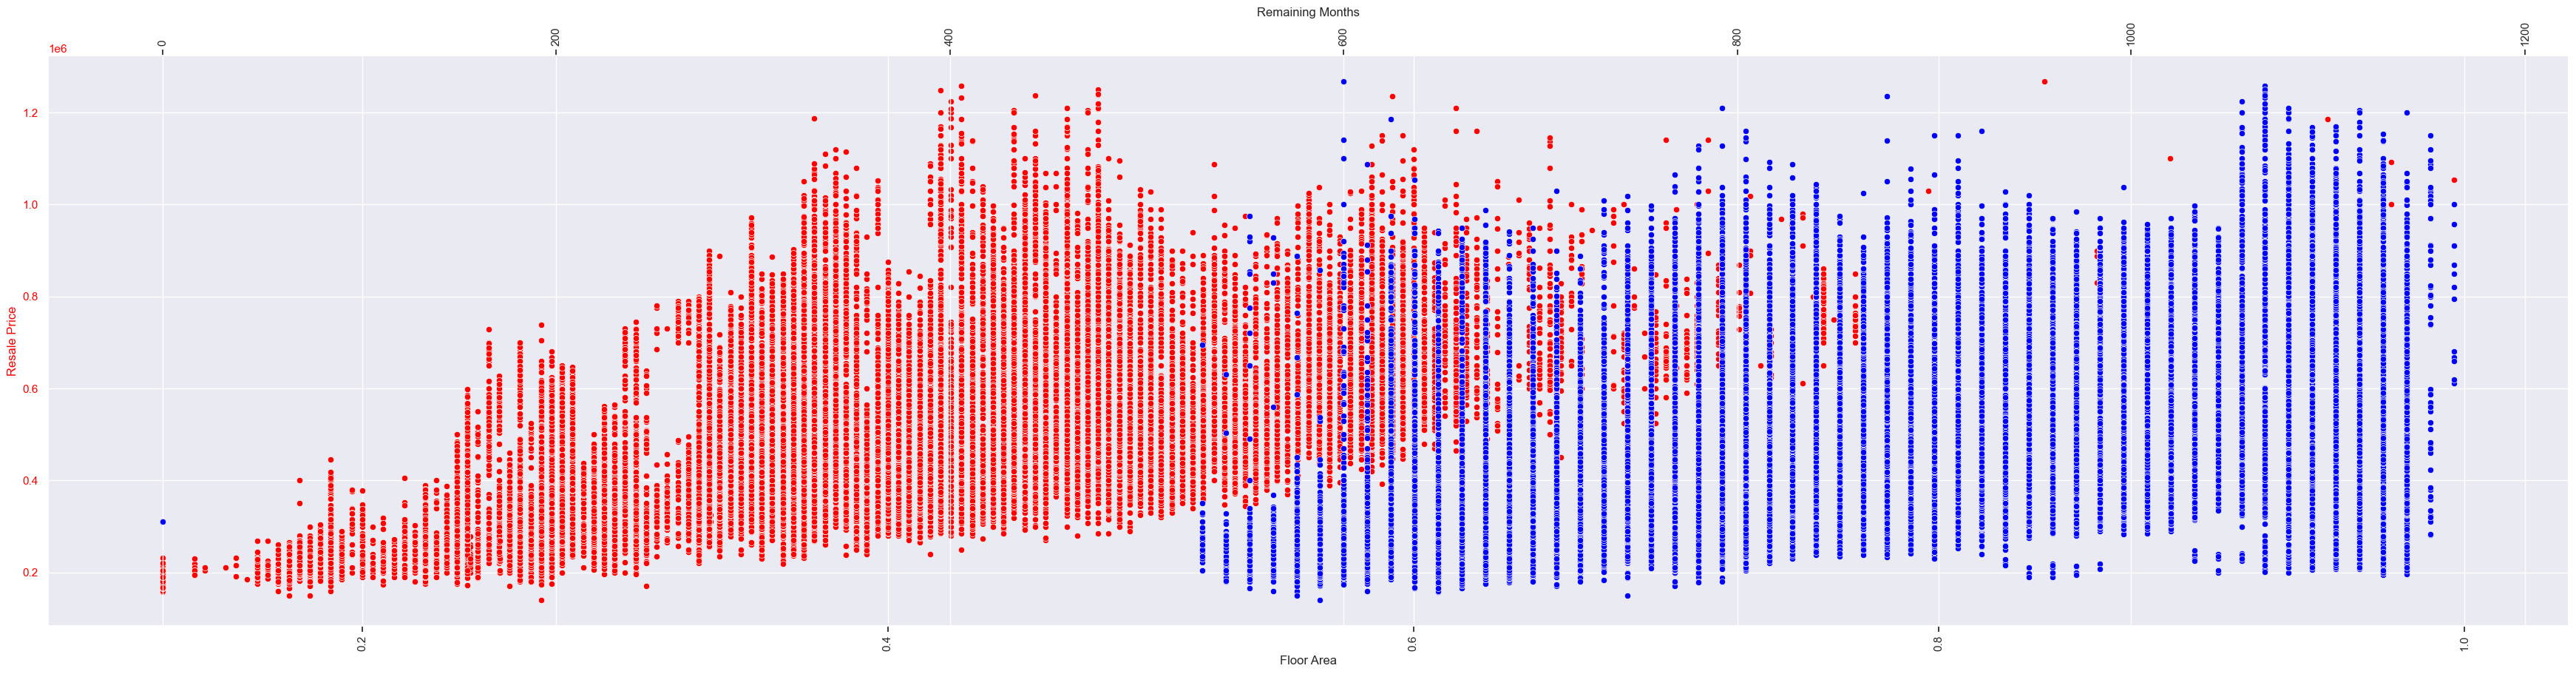

In [338]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

fig, ax1 = plt.subplots(figsize=(35, 9.27))



ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)
ax1.set_xlabel('Floor Area')
ax1.set_ylabel('Resale Price', color='red')
sns.scatterplot(data=df, x="floor_area_sqm", y="resale_price", color="red",  ax=ax1)
ax1.tick_params(axis='y', labelcolor='red')


ax2 = ax1.twiny()

ax2.set_xlabel('Remaining Months')
sns.scatterplot(data=df, x="remaining_lease_months", y="resale_price", color="blue",  ax=ax2)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)
# ax2.set_ylabel('Resale Price', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.tight_layout()
plt.show()


                                       


<Axes: xlabel='remaining_lease_months', ylabel='floor_area_sqm'>

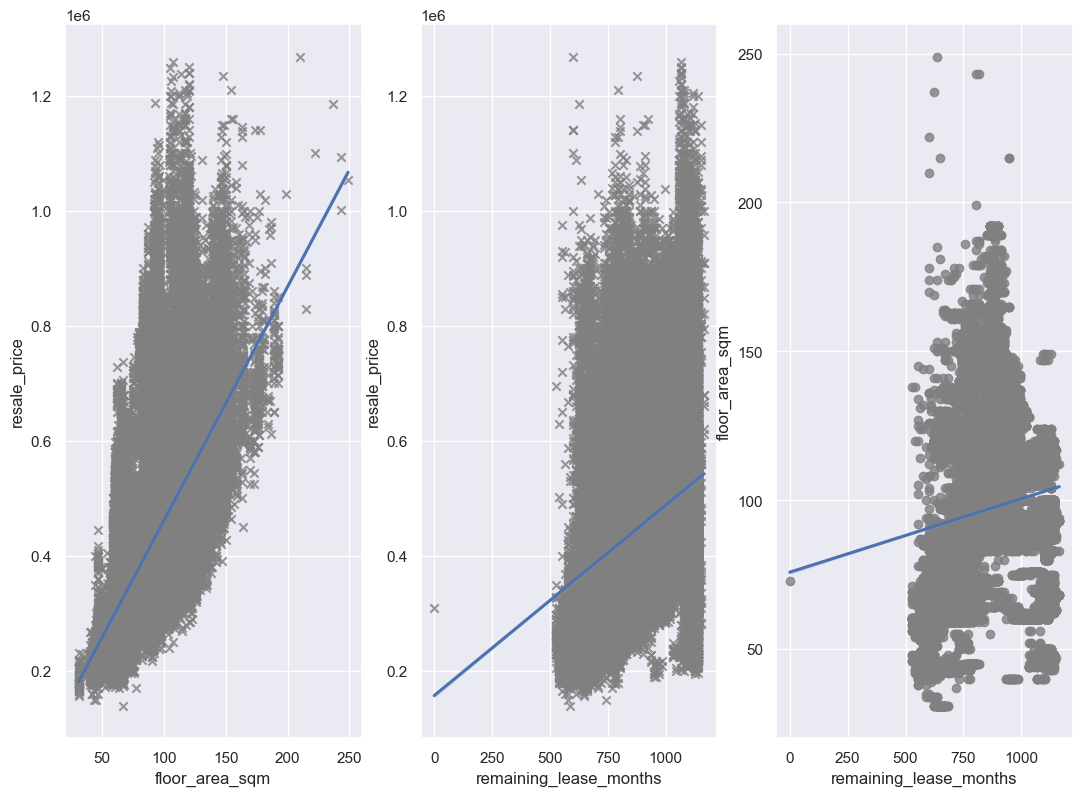

In [339]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
plt.subplot(1,3,1)
sns.regplot(data=df, x="floor_area_sqm", y="resale_price",ci=95, marker="x", color=".5", line_kws=dict(color="b"),)

plt.subplot(1, 3, 2)
sns.regplot(data=df, x="remaining_lease_months", y="resale_price", ci=95, marker="x", color=".5", line_kws=dict(color="b"),)

plt.subplot(1, 3, 3)
sns.regplot(data=df, x="remaining_lease_months", y="floor_area_sqm", ci=95, marker="o", color=".5", line_kws=dict(color="b"),)

<Axes: xlabel='remaining_lease_months', ylabel='floor_area_sqm'>

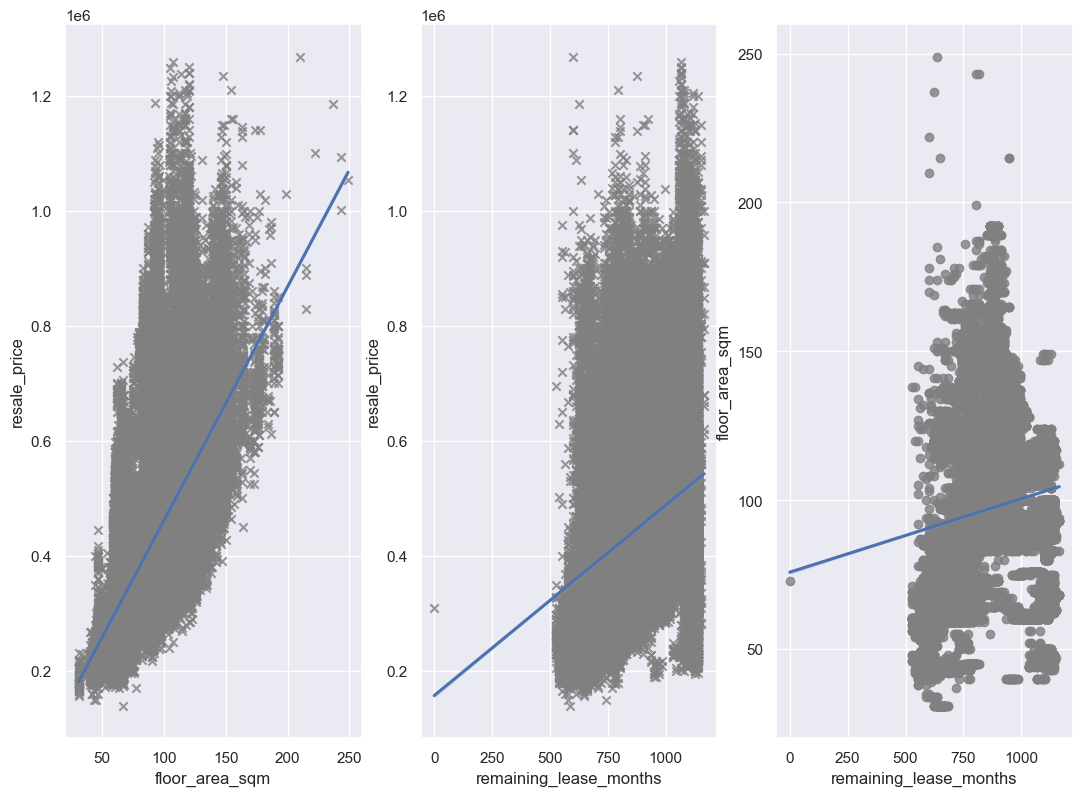

In [339]:
#In general in comparison to floor area and resale price,there is stronger positive correlation,compared to the remaing lease thats left.So the couple should emhasise more on the size of flat for better profits rather than the lease period left.

<Axes: xlabel='remaining_lease_months', ylabel='resale_price'>

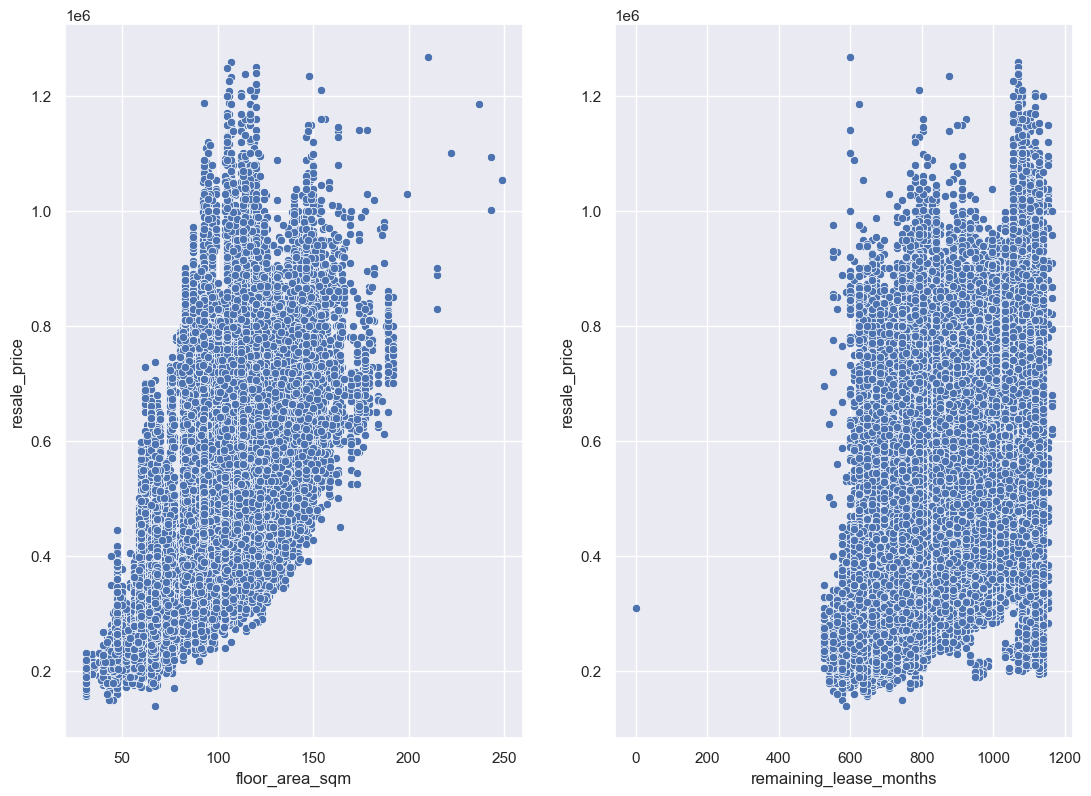

In [342]:
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x="floor_area_sqm", y="resale_price")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x="remaining_lease_months", y="resale_price")

In [344]:

df

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,remaining_lease_months
0,2017-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,232000.0,732
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,250000.0,720
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,262000.0,744
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,265000.0,744
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,265000.0,744
...,...,...,...,...,...,...,...,...
105470,2021-08,YISHUN,EXECUTIVE,10 TO 12,146.0,Maisonette,690000.0,780
105471,2021-08,YISHUN,EXECUTIVE,04 TO 06,146.0,Maisonette,620000.0,756
105472,2021-08,YISHUN,EXECUTIVE,01 TO 03,152.0,Maisonette,685000.0,744
105473,2021-08,YISHUN,EXECUTIVE,07 TO 09,142.0,Apartment,650000.0,768


In [346]:

df=pd.read_csv('modified.csv')
df.drop(columns=['Unnamed: 0.1', 'Unnamed: 0'], inplace=True)
cr=df.corr(numeric_only=True)     
print(cr)

                        floor_area_sqm  resale_price  remaining_lease_months
floor_area_sqm                1.000000      0.625669                0.162030
resale_price                  0.625669      1.000000                0.334338
remaining_lease_months        0.162030      0.334338                1.000000


In [348]:
X = df[['floor_area_sqm', 'remaining_lease_months']]
y = df['resale_price']
print(X)



        floor_area_sqm  remaining_lease_months
0                 44.0                     732
1                 67.0                     720
2                 67.0                     744
3                 68.0                     744
4                 67.0                     744
...                ...                     ...
105470           146.0                     780
105471           146.0                     756
105472           152.0                     744
105473           142.0                     768
105474           145.0                     756

[105475 rows x 2 columns]


In [350]:
import random
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=103)
model=LinearRegression()
model.fit(X_train,y_train)
print(model.coef_)
predictions = model.predict(X_test) 
print(predictions)

print('mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 


[3823.58039047  233.33367737]
[438342.92316609 595109.71917539 629521.94268963 ... 336942.00285838
 316952.60456446 258000.43794679]
mean_squared_error :  13615878354.238556
mean_absolute_error :  84944.92026329656


In [374]:

from sklearn.metrics import r2_score
model_r2=r2_score(y_test,predictions)
model_r2

0.4468925482291729

In [376]:
adj_modelr2=1-(1-model_r2)*(len(X_test)-1)/(len(X_test)-len(X_test.columns)-1)
print(adj_modelr2)

0.44685758568481315


In [406]:
df=pd.read_csv('modified.csv')
df=df.drop(columns=['Unnamed: 0.1','Unnamed: 0'])
df

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,remaining_lease_months
0,2017-01,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,232000.0,732
1,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,250000.0,720
2,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,262000.0,744
3,2017-01,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,265000.0,744
4,2017-01,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,265000.0,744
...,...,...,...,...,...,...,...,...
105470,2021-08,YISHUN,EXECUTIVE,10 TO 12,146.0,Maisonette,690000.0,780
105471,2021-08,YISHUN,EXECUTIVE,04 TO 06,146.0,Maisonette,620000.0,756
105472,2021-08,YISHUN,EXECUTIVE,01 TO 03,152.0,Maisonette,685000.0,744
105473,2021-08,YISHUN,EXECUTIVE,07 TO 09,142.0,Apartment,650000.0,768


In [408]:
import pandas as pd
town_dummies = pd.get_dummies(df['town'])

flat_dummies = pd.get_dummies(df['flat_type'])
storey_dummies =pd.get_dummies(df['storey_range'])
model_dummies = pd.get_dummies(df['flat_model'])


		


numeric_df = df.copy(deep=True)
numeric_df = pd.concat([numeric_df, town_dummies, flat_dummies, storey_dummies, model_dummies], axis = 'columns')



def convert_to_binary(value) -> int:
  
     if value is True:
        return 1
     elif value is False:
        return 0
     else:
        return value
         
numeric_df = numeric_df.map(convert_to_binary)
print(numeric_df)

          month        town  flat_type storey_range  floor_area_sqm  \
0       2017-01  ANG MO KIO     2 ROOM     10 TO 12            44.0   
1       2017-01  ANG MO KIO     3 ROOM     01 TO 03            67.0   
2       2017-01  ANG MO KIO     3 ROOM     01 TO 03            67.0   
3       2017-01  ANG MO KIO     3 ROOM     04 TO 06            68.0   
4       2017-01  ANG MO KIO     3 ROOM     01 TO 03            67.0   
...         ...         ...        ...          ...             ...   
105470  2021-08      YISHUN  EXECUTIVE     10 TO 12           146.0   
105471  2021-08      YISHUN  EXECUTIVE     04 TO 06           146.0   
105472  2021-08      YISHUN  EXECUTIVE     01 TO 03           152.0   
105473  2021-08      YISHUN  EXECUTIVE     07 TO 09           142.0   
105474  2021-08      YISHUN  EXECUTIVE     01 TO 03           145.0   

            flat_model  resale_price  remaining_lease_months  ANG MO KIO  \
0             Improved      232000.0                     732           

In [414]:
numeric_df=numeric_df.drop(columns=['month','town','flat_model','flat_type','storey_range'])

In [418]:
from sklearn.neighbors import KNeighborsRegressor
knn_X =numeric_df.drop(['resale_price'], axis=1) 
knn_y = numeric_df['resale_price'] 
knn_X_test,knn_X_train,knn_y_test,knn_y_train=train_test_split(knn_X,knn_y,test_size=0.3,random_state=101)


k=k : [0.9286216822648738, 0.7858589861624197]: 0.14276269610245418


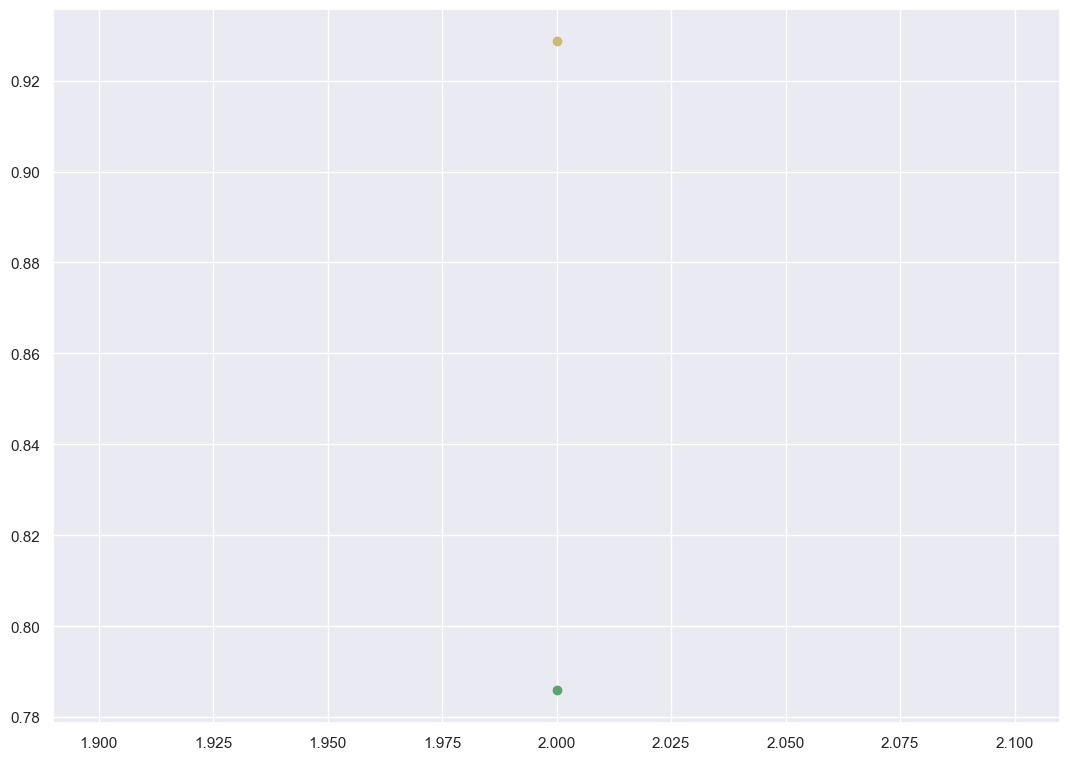

In [420]:
from sklearn.neighbors import KNeighborsRegressor

K=[]
training = []
testing = []
scores = {}

for k in range(2,):
    knn_model= KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(knn_X_train, knn_y_train)
    
    training_score = knn_model.score(knn_X_train, knn_y_train)
    testing_score = knn_model.score(knn_X_test, knn_y_test)
    K.append(k)
    
    training.append(training_score)
    testing.append(testing_score)
    scores={'k' :[training_score, testing_score]}
    
for k,v in scores.items():
    print(f"k={k} : {v}: {v[0]-v[1]}")
plt.scatter(K, training, color ='y') 
plt.scatter(K, testing, color ='g') 
plt.show() 
